<h1 align='center'>Модель линейной регрессии и метод наименьших квадратов<br></h1>
<br>
<p><font size='+1'><strong>Задача:</strong> аппроксимировать размеченную выборку до гиперплоскости так, чтобы метрика MSE была минимальна</font></p>
<br><br><br>

Код написан на Python3.9

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
sns.set(context='notebook', style='white', palette='deep', 
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

<br>
<h3 align='center'>Класс LinearRegression</h3>
<p>
<font size='+1'>Поля класса:</font>
    <li>X - матрица признаков (без целевого)</li>
    <li>y - целевая переменная</li>
    <li>w - веса модели. Они же являются коэффицентами уравнения гиперплоскости</li>
    <li>costs - массив ошибок, полученных при обучении модели</li>
    <li>trained - обучена модель на текущих данных (True) или ещё нет (False)</li>
    <br>

<font size='+1'>Функция MSE:</font><br>
    Считает среднеквадратиное отклонение
    <li>y - целевая переменная</li>
    <li>prediction - вектор предскаазанных значений</li>
    <br>

<font size='+1'>Метод get_weights:</font><br>
    Получение вектора весов модели; при необходимости модель обучится
    <br>
    <br>

<font size='+1'>Функция calculate:</font><br>
    Вычисление целевой переменной
    <li>x - матрица признаков</li>
    <br>

<font size='+1'>Метод change_data:</font><br>
    Заменяет тренировочные данные в модели и сбрасывает остальные поля к начальным значениям
    <li>X - матрица признаков (без целевого)</li>
    <li>y - целевая переменная</li>
    <br>

<font size='+1'>Метод show_learning:</font><br>
    Выводит график изменения метрики MSE в процессе обучения
    <br>
</p>

In [79]:
class LinearRegression:

    def __init__(self, x, y):
        self.X = np.hstack(([[1]] * x.shape[0], x))  # Добавление свободного члена (для построения гиперплоскости)
        self.y = y
        self.w = [np.random.random() for i in range(len(self.X[0]))]
        self.costs = None
        self.trained = False

    @staticmethod
    def MSE(y, prediction):
        """ Вычисление среднеквадратичного отклонения """
        return np.sum(np.square(prediction-y)) * (1/len(y))

    def __fit(self, learning_rate=0.001, iterations=10000):
        """ Обучение модели. Подбор весов. Реализация градиентного спуска и метода МНК """
        N = len(self.y)
        self.costs = np.zeros(iterations)
        for it in range(iterations):
            prediction = np.dot(self.X, self.w)
            self.w = self.w - (2/N) * learning_rate * (self.X.T.dot(prediction - self.y))  # 2*X.T.dot(prediction - y)/N - производная MSE
            self.costs[it] = LinearRegression.MSE(self.y, self.X.dot(self.w))

    def get_weights(self) -> list:
        """ Получение весов (коэффицентов уравнения гиперплоскости) обученной модели """
        if not self.trained:
            self.__fit()
            self.trained = True
        return list(self.w)

    def calculate(self, x):
        """ Вычисление целевой переменной """
        if not self.trained:
            self.__fit()
            self.trained = True
        return np.dot(np.hstack(([[1]] * x.shape[0], x)), self.w)

    def change_data(self, x, y):
        """ Замена тренировочного датасета """
        self.X = np.hstack(([[1]] * x.shape[0], x))
        self.y = y
        self.w = [np.random.random() for i in range(len(self.X[0]))]
        self.trained = False

    def show_learning(self):
        """ Вывод графика изменения метрики MSE """
        if not self.trained:
            self.__fit()
            self.trained = True
        scat = sns.lineplot([i for i in range(10000)], self.costs)
        scat.set(xlabel='Итерация', ylabel='MSE', title='Изменение MSE во время обучения')
        plt.grid()
        plt.show()

<h1 align='center'>Тесты</h1>
<p><font size='+1'>Все тесты проводятся на выборке, состоящей из 1го признака (помимо целевого), но модель работает с любой невырожденной матрицей. Так сделано для возможности визуализации результатов.</font></p>

In [85]:
X, y = datasets.make_regression(n_samples=5000, n_features=1, noise=30, shuffle=True)

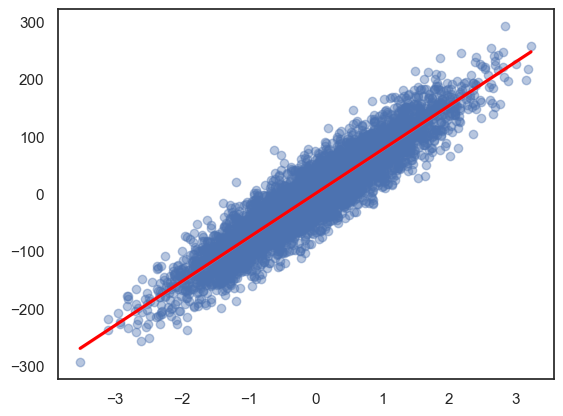

In [86]:
sns.regplot(X[:, 0], y, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.show()

In [87]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3)
model = LinearRegression(train_X, train_y)

Итоговый MSE = 925.6029993565464


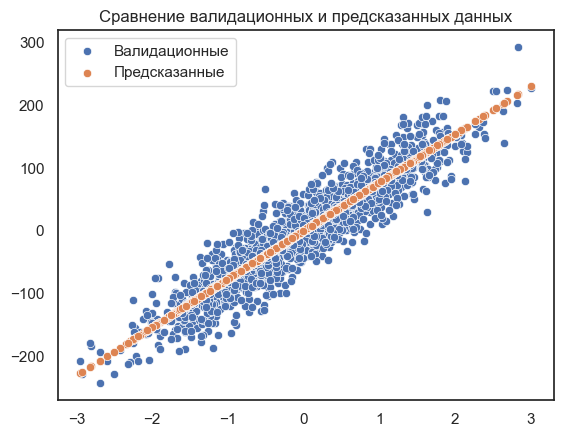

In [88]:
res = model.calculate(val_X)
print(f'Итоговый MSE = {LinearRegression.MSE(val_y, res)}')
sns.scatterplot(val_X[:, 0], val_y, label='Валидационные')
sns.scatterplot(val_X[:, 0], res, label='Предсказанные')
plt.legend()
plt.title('Сравнение валидационных и предсказанных данных')
plt.show()

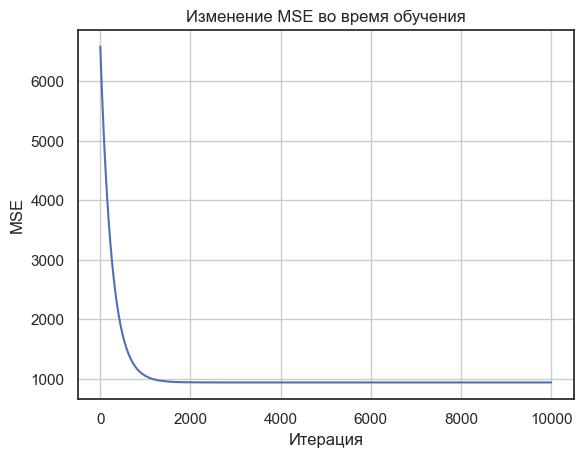

In [89]:
model.show_learning()

<h1 align='center'>Спасибо за внимание! 	&#128568;</h1>